#**Multi Region Geo-lift Analysis**

When randomised experiments aren’t possible, geo-lift analysis offers a way to estimate the causal impact of interventions like advertising campaigns by treating geographical regions as experimental units. When multiple regions are exposed to a campaign, analysts can choose between two approaches:

- Pooled strategy: combine treated regions into one aggregated group for a single analysis.

- Unpooled strategy: analyse each treated region separately to capture regional differences.

In [2]:
!pip install causalpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.7/244.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.4 MB/s eta 0:00:00


In [8]:
import causalpy as cp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### **Pooled Analysis Approach**

In [9]:
#load the data
df = (
    # load data from causal py library
    cp.load_data("geolift_multi_cell")
    # convert time column to datetime and set index
    .assign(time=lambda x: pd.to_datetime(x["time"]))
    .set_index("time")
)

In [12]:
# Create the aggregate geo
treated = ["t1", "t2", "t3", "t4"]
df["treated_agg"] = df[treated].median(axis=1)

In [13]:
# Define the treatment time
treatment_time = pd.to_datetime("2022-01-01")

In [15]:
# Model the aggregate geo as a linear combination of the untreated units
# with no intercept parameter.
formula = """treated_agg ~ 0 + u1 + u2 + u3 + u4 + u5 + u6 + u7 +
             u8 + u9 + u10 + u11 + u12"""

In [23]:
# Run the analysis
result = cp.SyntheticControl(
    df,
    treatment_time,
    control_units = ["u1","u2","u3","u4","u5",
                      "u6","u7","u8","u9","u10","u11","u12"],
    treated_units = ["treated_agg"],
    formula=formula,
    model=cp.pymc_models.WeightedSumFitter(
        sample_kwargs={"target_accept": 0.95, "random_seed": 42}
    ),
)

Output()

(<Figure size 700x800 with 3 Axes>,
 array([<Axes: title={'center': 'Pre-intervention Bayesian $R^2$: 0.9 (std = 0.0055)'}>,
        <Axes: title={'center': 'Causal Impact'}>,
        <Axes: title={'center': 'Cumulative Causal Impact'}>], dtype=object))

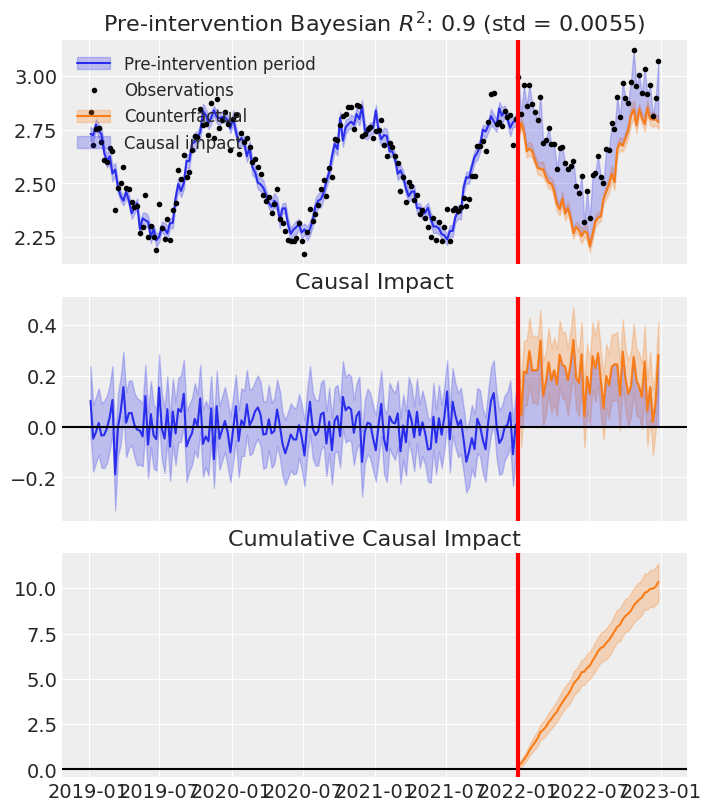

In [26]:
result.plot()

###**Unpooled analysis Approach**

In [37]:
#t1

result_t1 = cp.SyntheticControl(
    df,
    treatment_time,
    control_units = ["u1","u2","u3","u4","u5",
                      "u6","u7","u8","u9","u10","u11","u12"],
    treated_units = ["t1"],
    formula=formula,
    model=cp.pymc_models.WeightedSumFitter(
        sample_kwargs={"target_accept": 0.95, "random_seed": 42}
    ),
  )

Output()

In [39]:
#t2

result_t2 = cp.SyntheticControl(
    df,
    treatment_time,
    control_units = ["u1","u2","u3","u4","u5",
                      "u6","u7","u8","u9","u10","u11","u12"],
    treated_units = ["t2"],
    formula=formula,
    model=cp.pymc_models.WeightedSumFitter(
        sample_kwargs={"target_accept": 0.95, "random_seed": 42}
    ),
  )

Output()

In [40]:
#t3

result_t3 = cp.SyntheticControl(
    df,
    treatment_time,
    control_units = ["u1","u2","u3","u4","u5",
                      "u6","u7","u8","u9","u10","u11","u12"],
    treated_units = ["t3"],
    formula=formula,
    model=cp.pymc_models.WeightedSumFitter(
        sample_kwargs={"target_accept": 0.95, "random_seed": 42}
    ),
  )

Output()

In [41]:
#t4

result_t4 = cp.SyntheticControl(
    df,
    treatment_time,
    control_units = ["u1","u2","u3","u4","u5",
                      "u6","u7","u8","u9","u10","u11","u12"],
    treated_units = ["t4"],
    formula=formula,
    model=cp.pymc_models.WeightedSumFitter(
        sample_kwargs={"target_accept": 0.95, "random_seed": 42}
    ),
  )

Output()

### Plots

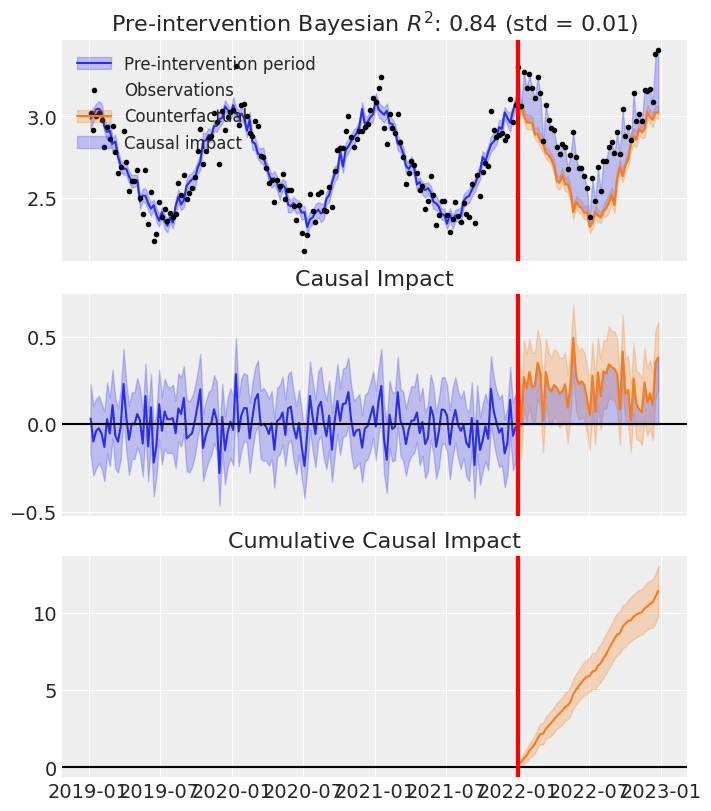

In [49]:
result_t1.plot()
plt.show()

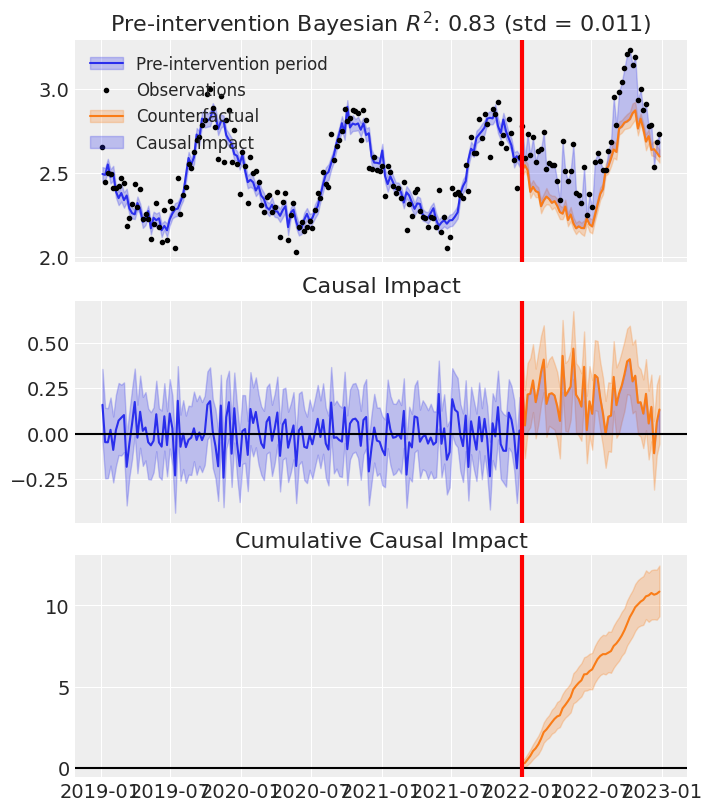

In [48]:
result_t2.plot()
plt.show()

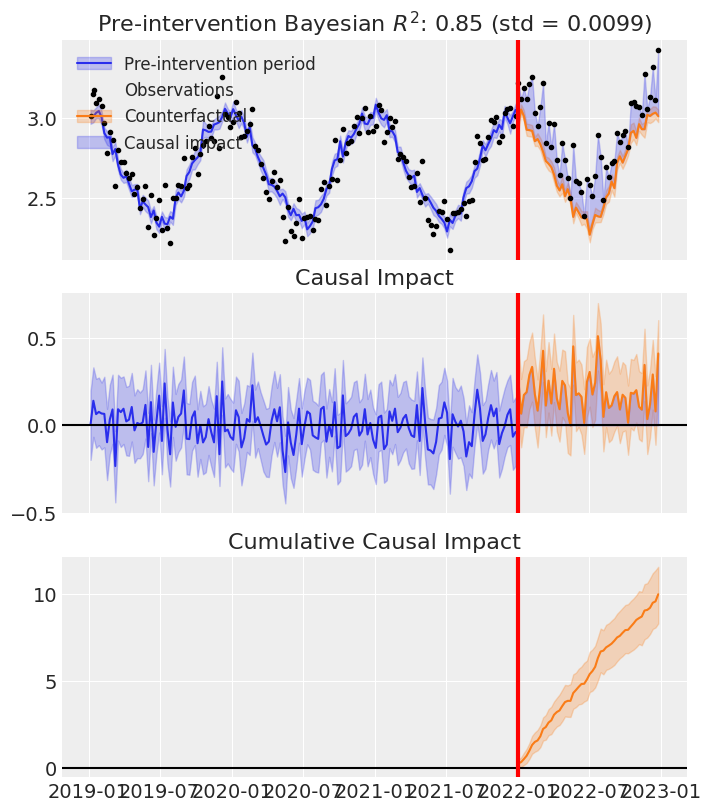

In [46]:
result_t3.plot()
plt.show()

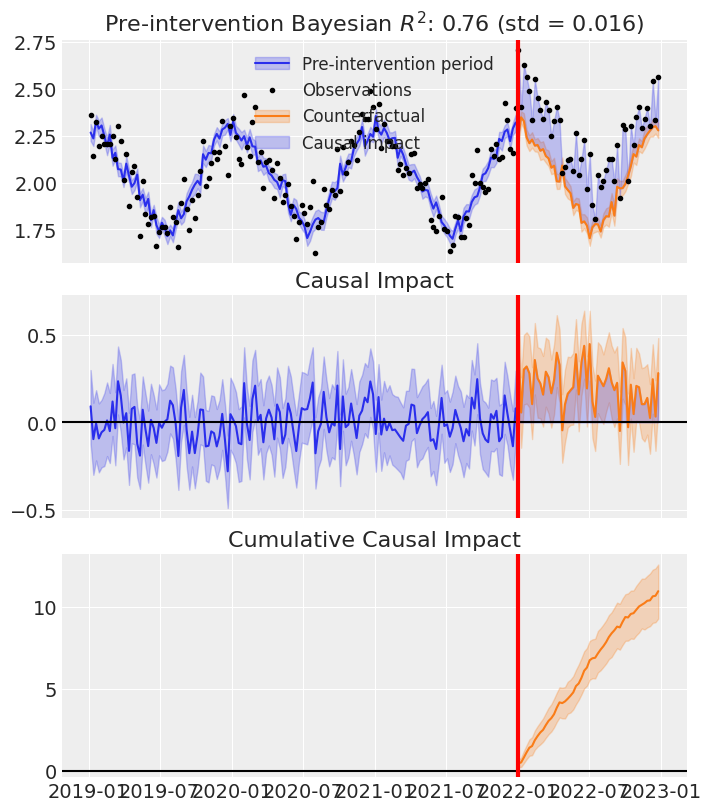

In [47]:
result_t4.plot()
plt.show()

The pooled approach might be most appropriate when we have implemented the same kind (and magnitude) of intervention across multiple regions.

The unpooled approach however might be best used if we have used different kinds of interventions across each treatment region as we’ll get individual estimates for the lift in each treated geo.


## References

- https://drbenvincent.medium.com/multi-region-geo-lift-analysis-c4369fb674d9